In [1]:
# Incluir las bibliotecas requeridas para la exploración de datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar set de datos, información de número de columnas y ejemplo de contenido con las primeros registros
df = pd.read_csv("diabetes_USA.csv")
pd.set_option('display.max_columns', None)
print(df.shape)
df.head()

(253680, 22)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
# Descripción del tipo de dato en cada columna y determinación de valores nulos en acada variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
# Descripción de las principales estadísticas para variables numéricas
df[["BMI", "MentHlth", "PhysHlth"]].describe()

,BMI,MentHlth,PhysHlth
count,253680.000000,253680.000000,253680.000000
mean,28.382364,3.184772,4.242081
std,6.608694,7.412847,8.717951
min,12.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000
75%,31.000000,2.000000,3.000000
max,98.000000,30.000000,30.000000


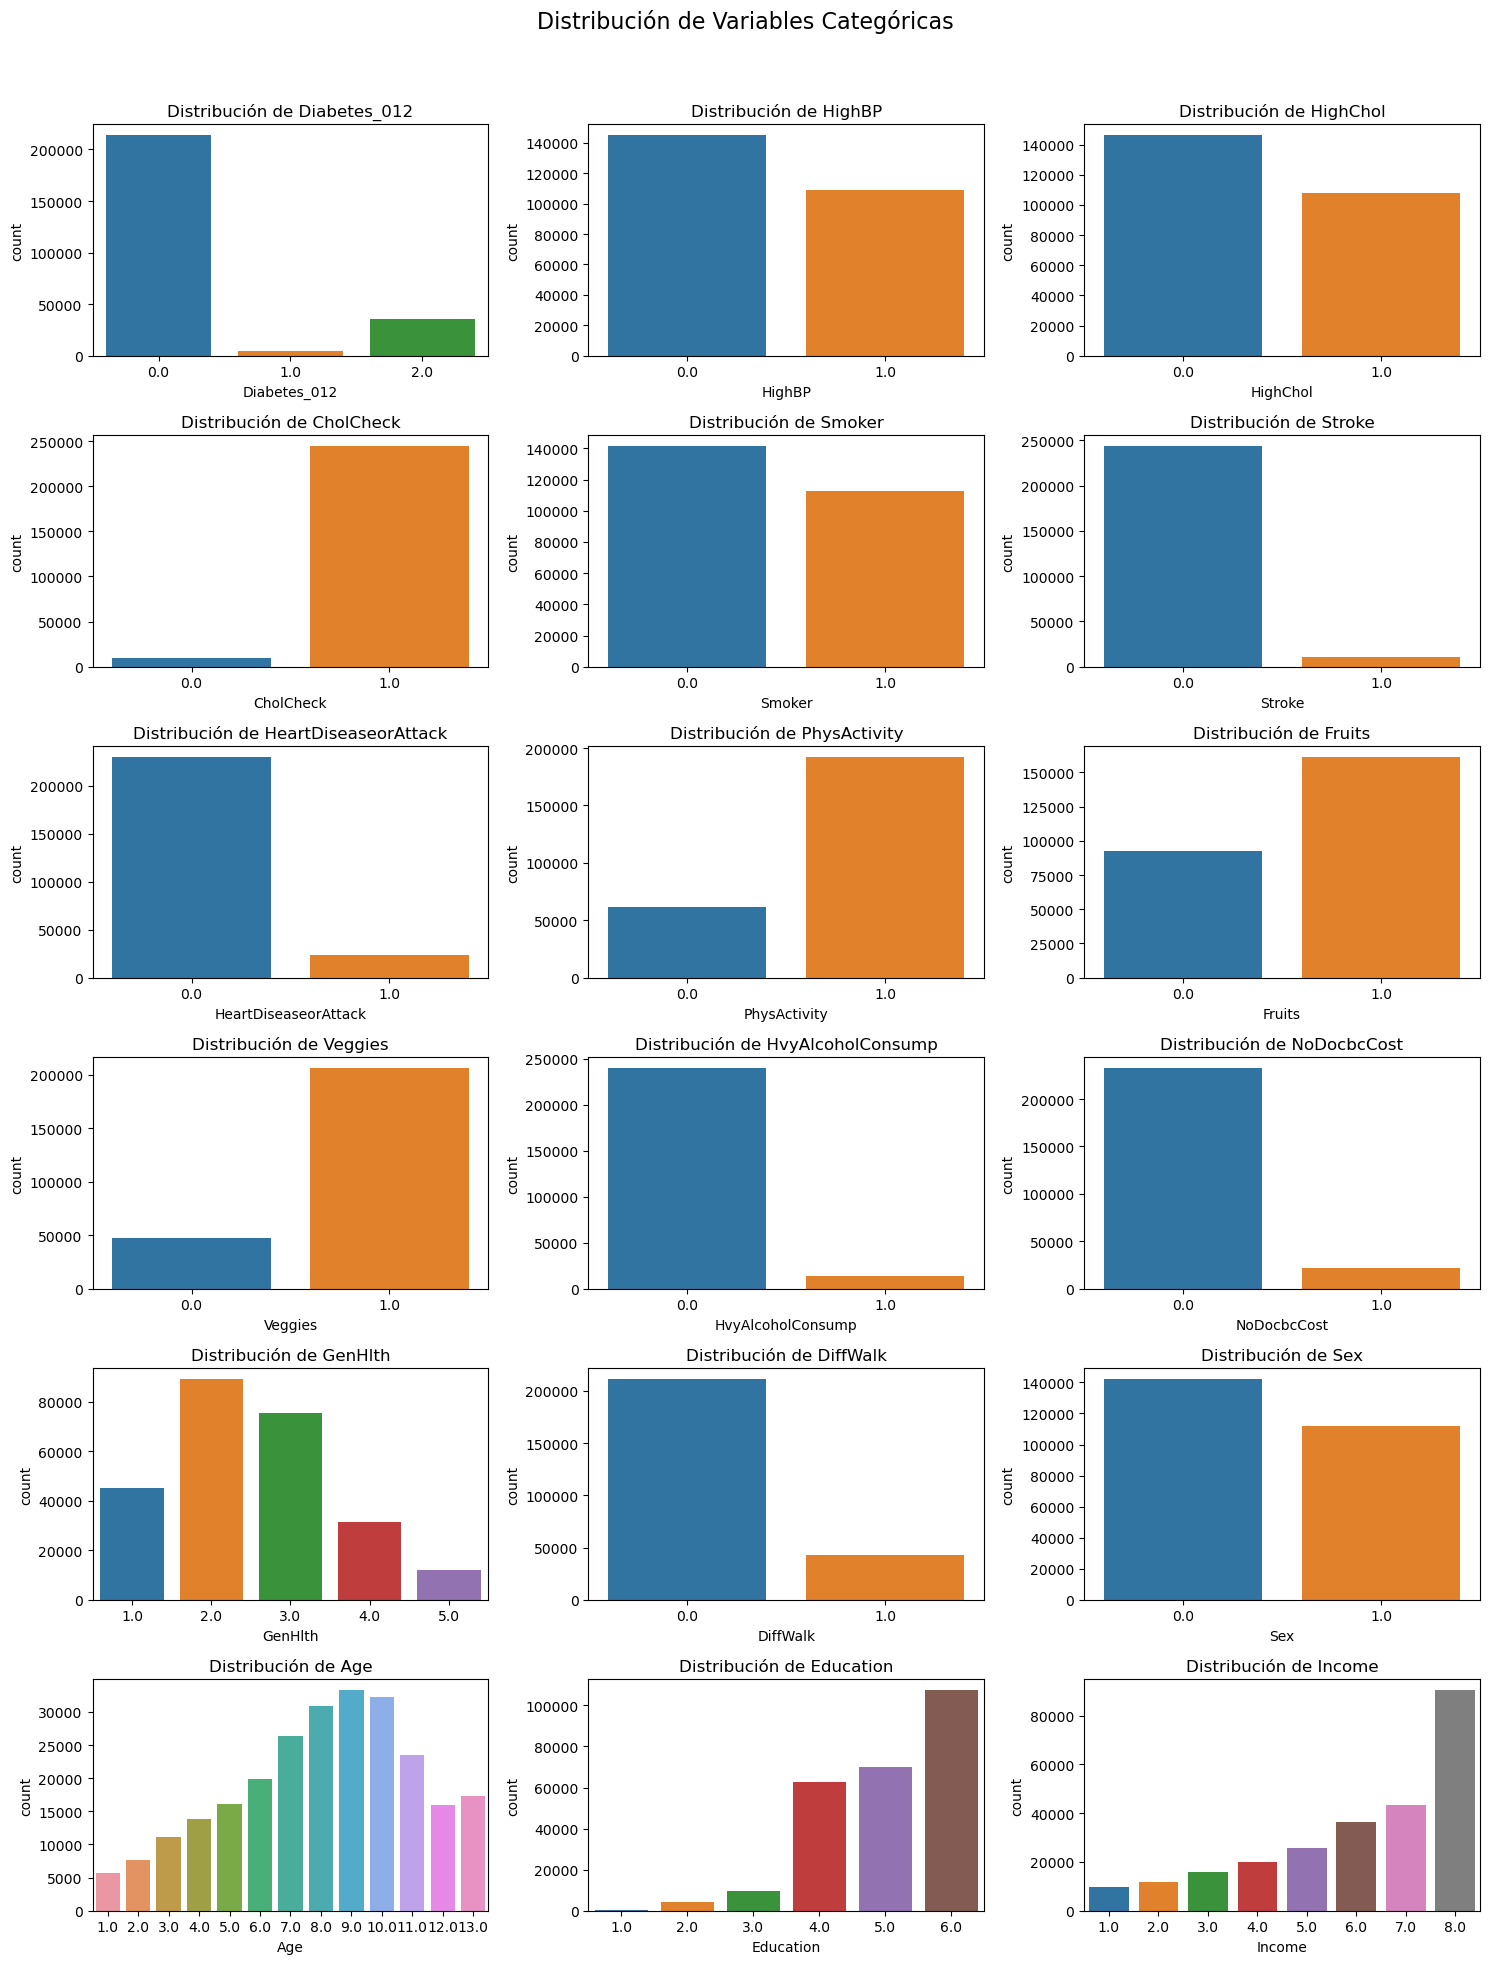

In [5]:
# Frecuencia de categorías de las variables categóricas

categorical_vars = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                   'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'NoDocbcCost', 'GenHlth', 'DiffWalk',
                   'Sex', 'Age', 'Education', 'Income']

# Número de filas y columnas para el grid
n_rows = 6
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
fig.suptitle('Distribución de Variables Categóricas', fontsize=16)

# Generar los gráficos para cada variable categórica
for i, var in enumerate(categorical_vars):
    row = i // n_cols
    col = i % n_cols
    sns.countplot(x=var, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Distribución de {var}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

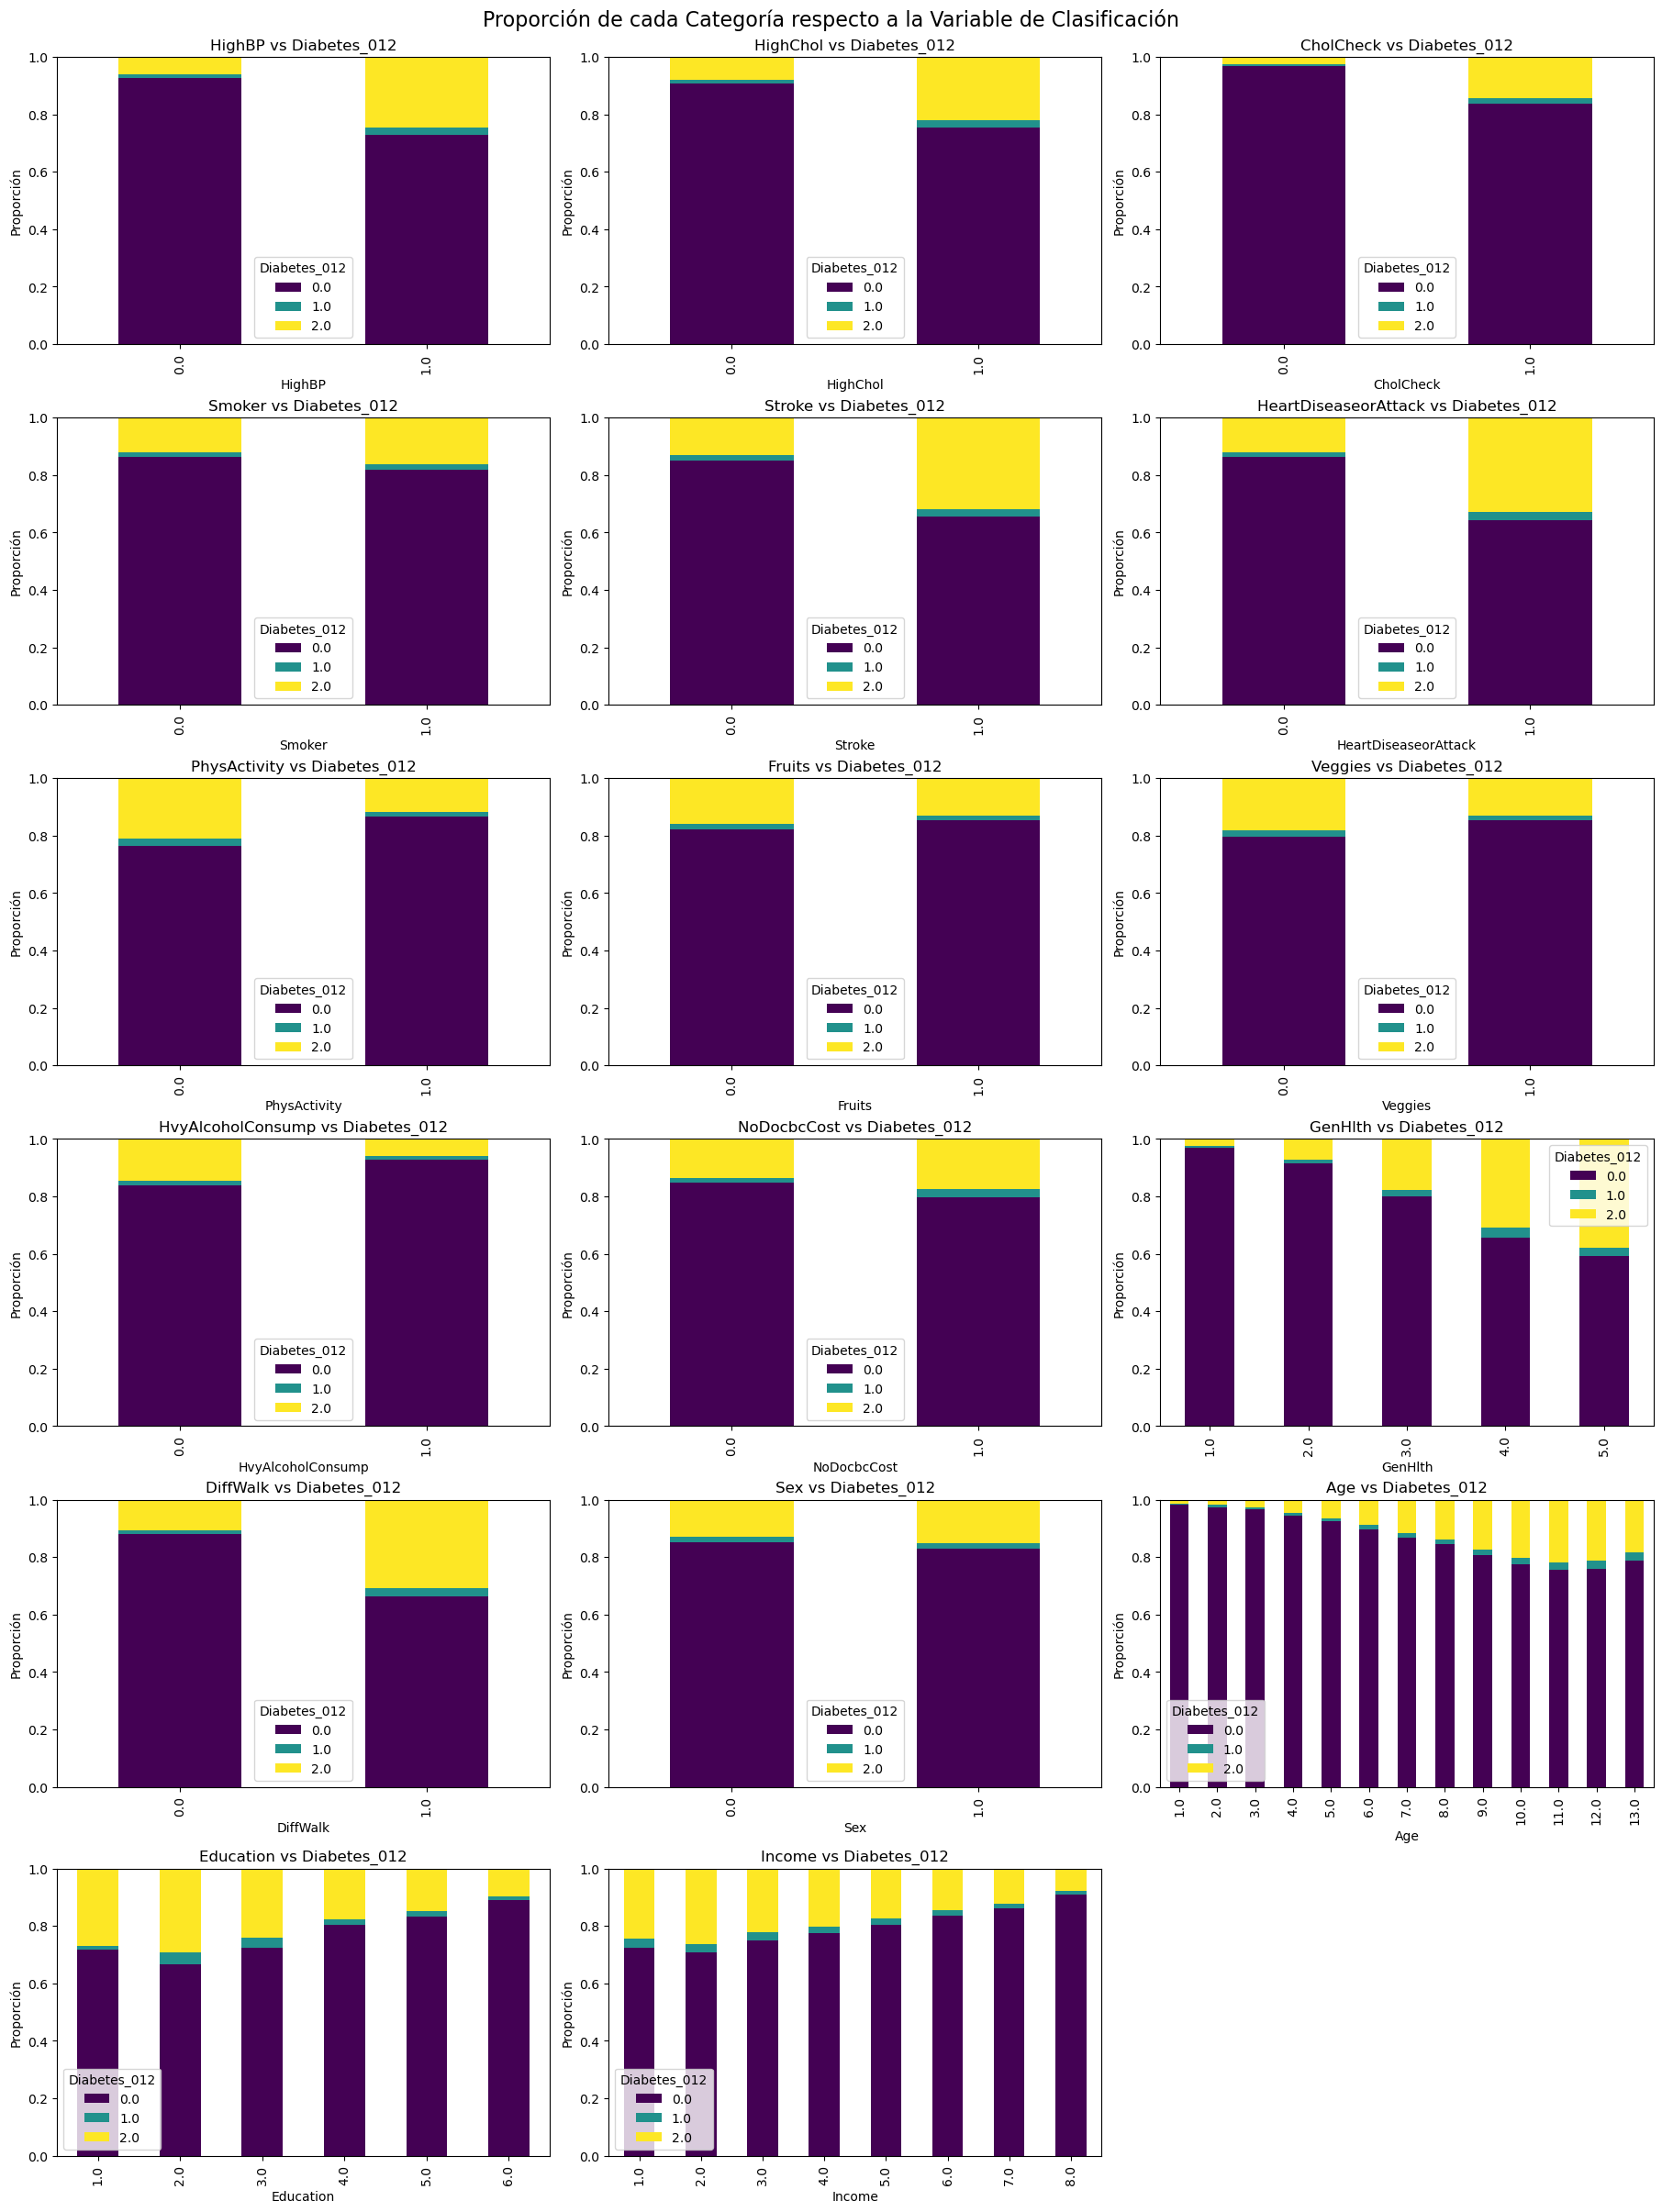

In [25]:
# Proporción de cada Categoría respecto a la Variable de Clasificación

# Variables categóricas y variable de salida
categorical_vars = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'NoDocbcCost', 'GenHlth', 
                    'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
output_var = 'Diabetes_012'

# Configurar la figura para 6 filas y 3 columnas
num_rows = 6
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 24), constrained_layout=True)

# Aplanar el array de ejes para facilitar el acceso
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    if var in df.columns and output_var in df.columns:
        # Crear tabla de contingencia de proporciones
        proportions = pd.crosstab(df[var], df[output_var], normalize='index')
        proportions.plot(kind='bar', stacked=True, ax=axes[i], colormap='viridis')
        axes[i].set_title(f'{var} vs {output_var}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Proporción')
        axes[i].set_ylim(0, 1)  # Asegura que el eje y vaya de 0 a 1

# Ocultar los ejes vacíos si hay menos de 18 variables
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')  # Ocultar ejes adicionales

plt.suptitle('Proporción de cada Categoría respecto a la Variable de Clasificación', fontsize=16)
plt.show()

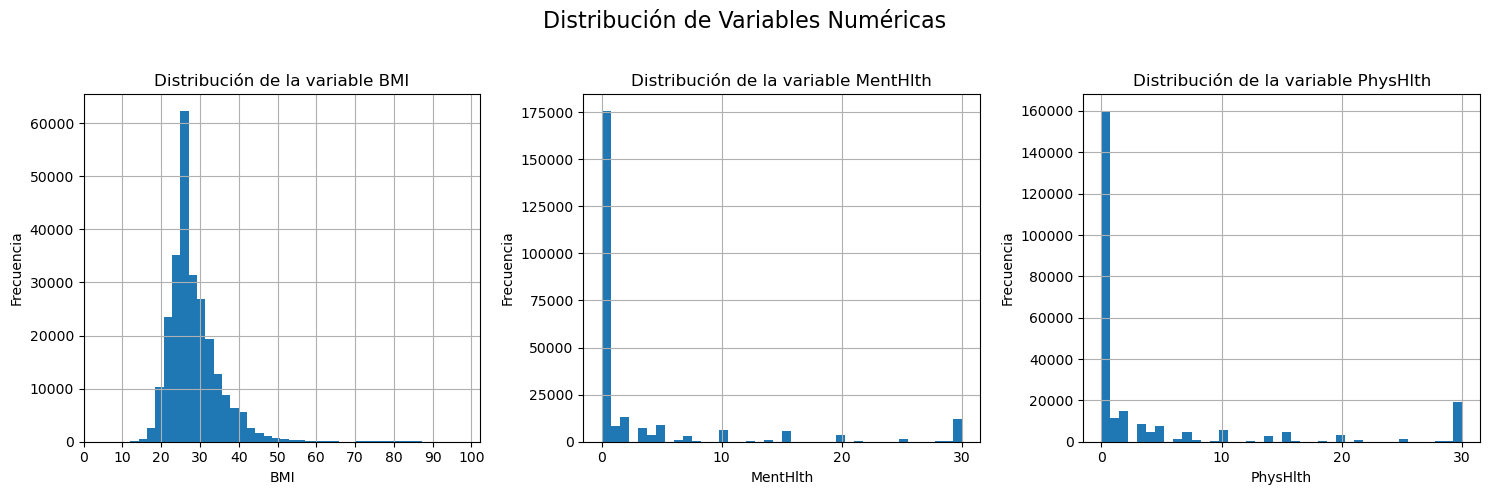

In [15]:
# Histograma para variables numéricas

num_vars = ['BMI', 'MentHlth', 'PhysHlth']

# Número de filas y columnas para el grid
n_rows = 1
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5))
fig.suptitle('Distribución de Variables Numéricas', fontsize=16)

# Generar los gráficos para cada variable categórica
for i, var in enumerate(num_vars):
    df[var].hist(bins=40, ax=axes[i])
    axes[i].set_title(f'Distribución de la variable {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')
    axes[i].set_xticks(range(0, int(df[var].max()) + 10, 10))

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

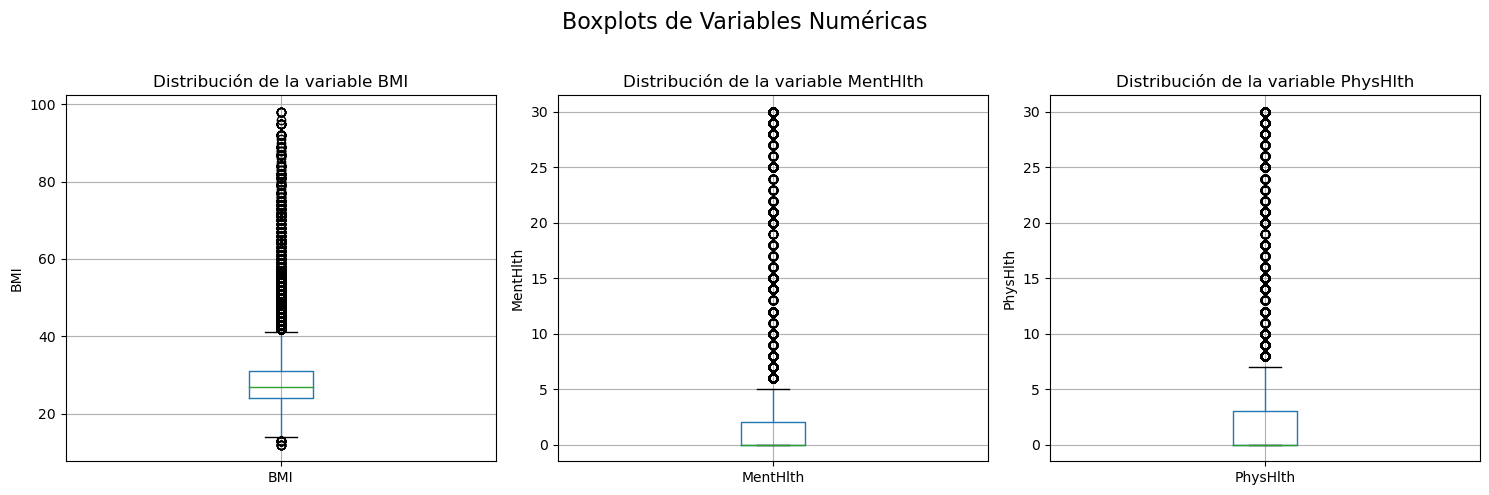

In [17]:
# Boxplot de las variables numéricas

# Variables numéricas a graficar
num_vars = ['BMI', 'MentHlth', 'PhysHlth']

# Configuración de filas y columnas para el grid de subplots
n_rows = 1
n_cols = 3

# Crear la figura y los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5))
fig.suptitle('Boxplots de Variables Numéricas', fontsize=16)

# Generar los boxplots para cada variable numérica
for i, var in enumerate(num_vars):
    df.boxplot(column=var, ax=axes[i])
    axes[i].set_title(f'Distribución de la variable {var}')
    axes[i].set_ylabel(var)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


               BMI  MentHlth  PhysHlth
BMI       1.000000  0.085310  0.121141
MentHlth  0.085310  1.000000  0.353619
PhysHlth  0.121141  0.353619  1.000000


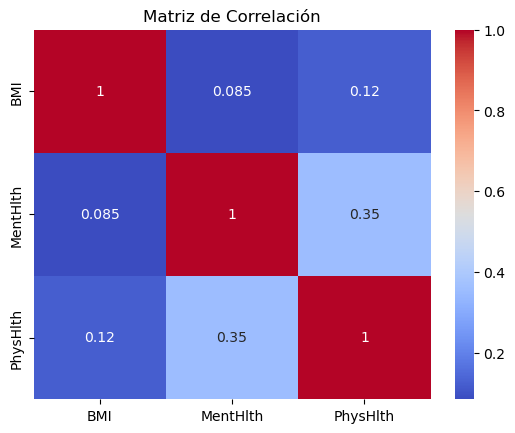

In [19]:
# Matriz de correlación variables numéricas
corr_matrix = df[['BMI', 'MentHlth', 'PhysHlth']].corr()
print(corr_matrix)

# Visualización del mapa de calor de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

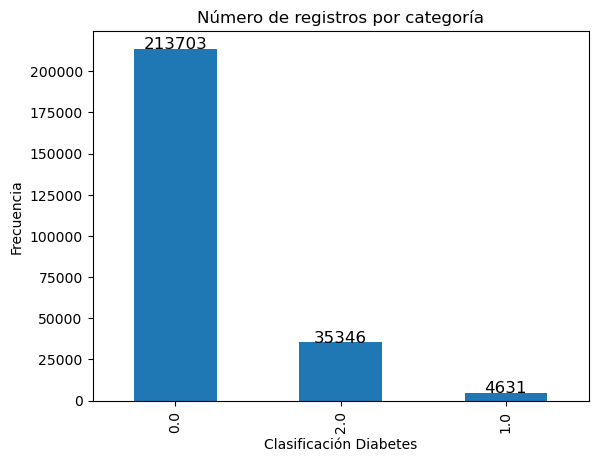

In [16]:
num_categorias = df['Diabetes_012'].value_counts()

ax = num_categorias.plot(kind='bar')

plt.title('Número de registros por categoría')
for i, valor in enumerate(num_categorias):
    ax.text(i, valor + 0.05, str(valor), ha='center', fontsize=12)
plt.xlabel('Clasificación Diabetes')
plt.ylabel('Frecuencia')

plt.show()

In [ ]:
# Ejemplo para incluir en el análisis

